# Red Neuronal Recurrente

Crea una red neuronal para predecir el precio del dolar

In [6]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para el preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerías para crear la red neuronal
from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU

In [7]:
data = pd.read_csv('datasets/euro.csv', header=None)
data

,0
0,21.5069
1,21.5994
2,21.5927
3,21.4137
4,21.5314
...,...
4544,15.9902
4545,16.0863
4546,16.0171
4547,16.1123


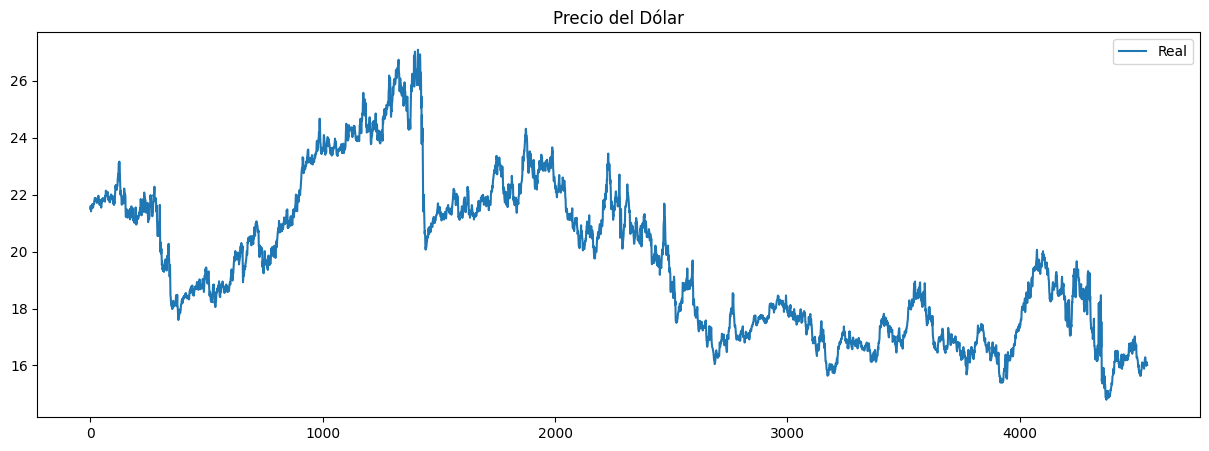

In [8]:
# Grafico de la serie de tiempo
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(data, label='Real')
plt.legend()

## 2. Crear secuencias temporales

In [9]:
# Normalización de los precios
prices = np.array(data[0])

normalizer = MinMaxScaler()
prices_norm = normalizer.fit_transform(prices.reshape(-1, 1))

# Crear datos de entrada y de salida, en base a secuencias
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(prices_norm, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

## 3. Crear Red Neuronal de Regresión

In [10]:
# Separar datos de entrada y de salida

X_nn = np.linspace(0, 1, len(prices_norm))

nn_model = Sequential([
    # Capa de entrada
    Input([1]),
    Dense(256, activation='relu'),

    # Capas ocultas
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    # Capa de salida
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_nn, prices_norm, epochs=100, batch_size=400)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1459 - mae: 0.3202
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0829 - mae: 0.2479
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0447 - mae: 0.1785
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0231 - mae: 0.1197
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202 - mae: 0.1100
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0173 - mae: 0.1014
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mae: 0.0951
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0132 - mae: 0.0922
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - mae: 0.0904
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - mae: 0.0897
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0112 - mae: 0.0875
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0107 - mae: 0.0866
Epoch 13/100
12/12 ━━━━━━

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


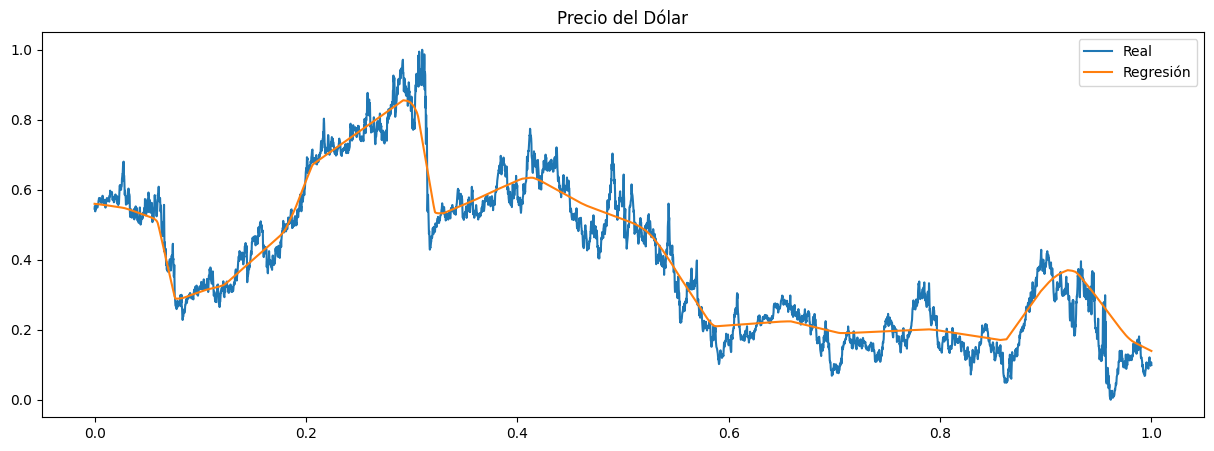

In [11]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.legend()

## 4. Crear Red Neuronal Recurrente Simple

In [13]:
rnn_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    SimpleRNN(256, return_sequences=True),

    # Capas ocultas
    SimpleRNN(128),

    # Capa de salida
    Dense(1, activation='linear')
])

rnn_model.summary()

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model.fit(X, y, epochs=50, batch_size=400) 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 256)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,457 (451.00 KB)

 Trainable params: 115,457 (451.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.4950 - mae: 0.4331
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0149 - mae: 0.1048
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0051 - mae: 0.0564
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0019 - mae: 0.0345
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0010 - mae: 0.0242
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 7.4127e-04 - mae: 0.0202
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 6.8312e-04 - mae: 0.0192
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 6.3807e-04 - mae: 0.0184
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 6.1924e-04 - mae: 0.0181
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 5.9339e-04 - mae: 0.0177
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5.7224e-04 - mae: 0.0173
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 5.5601e-04 - mae: 0.0171
Epoch 13/

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


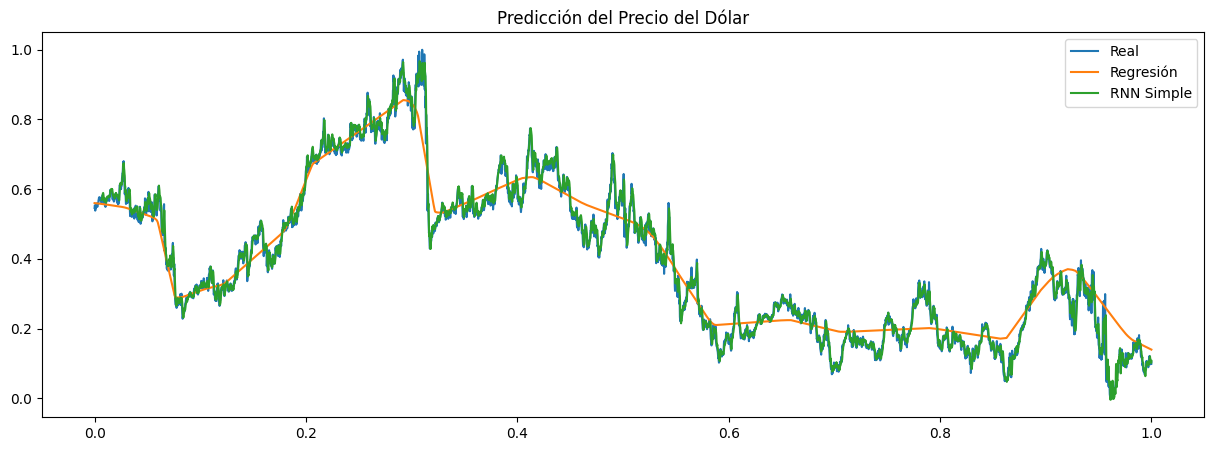

In [14]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Predicción del Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='RNN Simple')
plt.legend()

In [15]:
lstm_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    LSTM(256, return_sequences=True),

    # Capas ocultas
    LSTM(128),

    # Capa de salida
    Dense(1, activation='linear')
])

lstm_model.summary()

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X, y, epochs=50, batch_size=400)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,441 (1.76 MB)

 Trainable params: 461,441 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - loss: 0.0383 - mae: 0.1364
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - loss: 0.0043 - mae: 0.0544
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - loss: 0.0018 - mae: 0.0332
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 9.7749e-04 - mae: 0.0230
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 8.3248e-04 - mae: 0.0213
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 7.5785e-04 - mae: 0.0200
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - loss: 7.2395e-04 - mae: 0.0193
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 7.0837e-04 - mae: 0.0191
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - loss: 6.9646e-04 - mae: 0.0189
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 6.8916e-04 - mae: 0.0189
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - loss: 6.8698e-04 - mae: 0.0188
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - loss: 6.7927e-04 - m

## 6. Crear Red Neuronal Recurrente GRU

In [16]:
gru_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    GRU(256, return_sequences=True),

    # Capas ocultas
    GRU(128),

    # Capa de salida
    Dense(1, activation='linear')

])
gru_model.summary()

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.fit(X, y, epochs=50, batch_size=400)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 30, 256)        │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,265 (1.32 MB)

 Trainable params: 347,265 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - loss: 0.0428 - mae: 0.1497
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - loss: 0.0061 - mae: 0.0643
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 0.0013 - mae: 0.0282
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - loss: 7.1980e-04 - mae: 0.0211
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - loss: 4.4266e-04 - mae: 0.0155
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 3.7333e-04 - mae: 0.0142
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 3.3598e-04 - mae: 0.0131
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - loss: 3.2223e-04 - mae: 0.0127
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - loss: 3.1729e-04 - mae: 0.0126
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 3.1365e-04 - mae: 0.0126
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - loss: 3.0988e-04 - mae: 0.0125
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - loss: 3.0499e-04 - m

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step


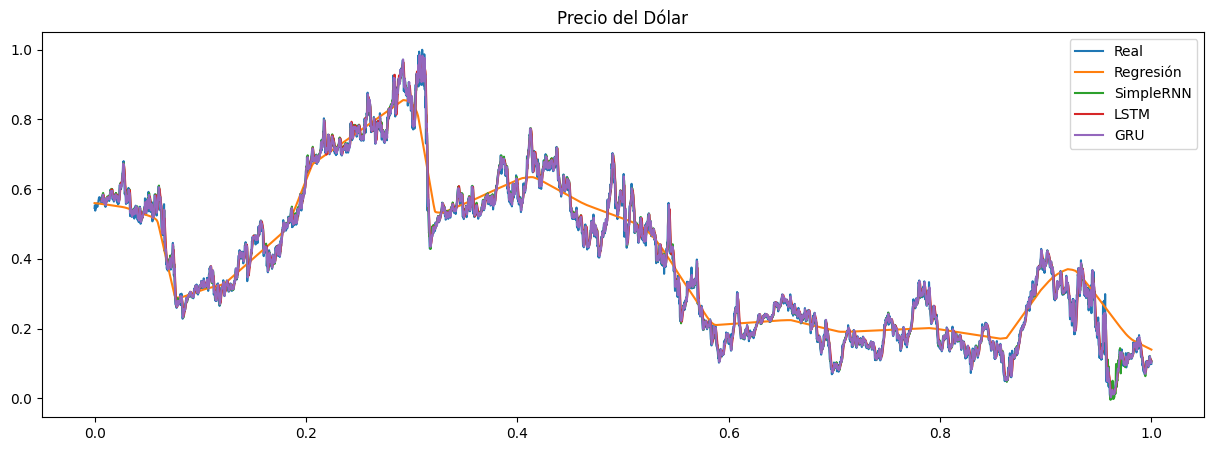

In [17]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='SimpleRNN')
plt.plot(X_nn[time_steps:], lstm_model.predict(X), label='LSTM')
plt.plot(X_nn[time_steps:], gru_model.predict(X), label='GRU')
plt.legend()

## 7. Predecir el futuro

In [18]:
def next_time(model):
    Y = model.predict(prices_norm[-time_steps:].reshape(1, time_steps, 1))
    return normalizer.inverse_transform(Y.reshape(-1, 1))

def error(model, X, y):
    loss, mae = model.evaluate(X, y)
    normalizer.inverse_transform(np.array(mae).reshape(-1, 1))
    return f' con un error de +- {mae}'

print('En el siguiente paso de tiempo, el precio del dolar será de: ')
print(f' -> Regresión: ${normalizer.inverse_transform(nn_model(X_nn[1:2] + 1))[0, 0]}' + error(nn_model, X_nn, prices_norm))
print(f' -> RNN Simple: ${next_time(rnn_model)[0, 0]}' + error(rnn_model, X, y))
print(f' -> LSTM: ${next_time(lstm_model)[0, 0]}' + error(lstm_model, X, y))
print(f' -> GRU: ${next_time(gru_model)[0, 0]}' + error(gru_model, X, y))

En el siguiente paso de tiempo, el precio del dolar será de: 
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033 - mae: 0.0430
 -> Regresión: $16.504697802212835 con un error de +- 0.0430477075278759
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.9892e-04 - mae: 0.0123
 -> RNN Simple: $16.058067321777344 con un error de +- 0.012250710278749466
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 4.4005e-04 - mae: 0.0152
 -> LSTM: $16.08442497253418 con un error de +- 0.015155897475779057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 2.2500e-04 - mae: 0.0104
 -> GRU: $16.05919075012207 con un error de +- 0.010433007963001728


In [19]:
time_steps = 5
nn_future = nn_model.predict(X_nn[:time_steps] + 1)

def future(model, X, time_steps=5):
    Y = []
    for i in range(time_steps):
        predict = model.predict(X[-time_steps:].reshape(1, time_steps, 1))
        X = np.append(X, predict[0, 0])
        Y.append(predict[0, 0])

    return np.array(Y)

rnn_future = future(rnn_model, prices_norm.copy(), time_steps)
lstm_future = future(lstm_model, prices_norm.copy(), time_steps)
gru_future = future(gru_model, prices_norm.copy(), time_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


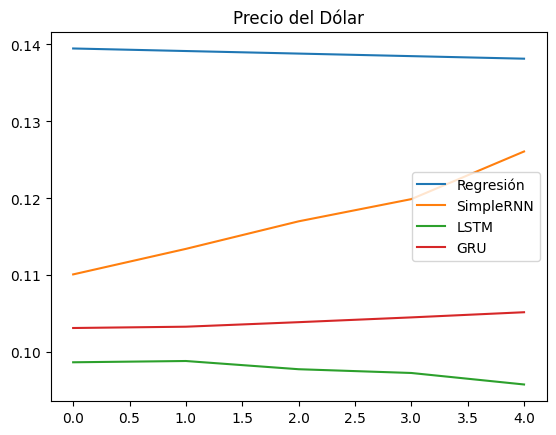

In [20]:
# Visualizar predicción
plt.title('Precio del Dólar')
plt.plot(nn_future, label = 'Regresión')
plt.plot(rnn_future, label = 'SimpleRNN')
plt.plot(lstm_future, label = 'LSTM')
plt.plot(gru_future, label = 'GRU')
plt.legend()